In [1]:
import pandas as pd

data = pd.read_csv("C:/Users/HHemery_stg/Downloads/train.csv")

df= pd.DataFrame(data)

df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [2]:
 df.info() #affichage non null et type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [3]:
df.isna().sum() #comptage Valeurs manquantes

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [4]:
num_cols=df.select_dtypes(include=["number"]) # Séparation colonnes numériques et catégoriques

num_cols_final=num_cols.drop(["id"],axis=1)

print(num_cols_final.head())

   bone_length  rotting_flesh  hair_length  has_soul
0     0.354512       0.350839     0.465761  0.781142
1     0.575560       0.425868     0.531401  0.439899
2     0.467875       0.354330     0.811616  0.791225
3     0.776652       0.508723     0.636766  0.884464
4     0.566117       0.875862     0.418594  0.636438


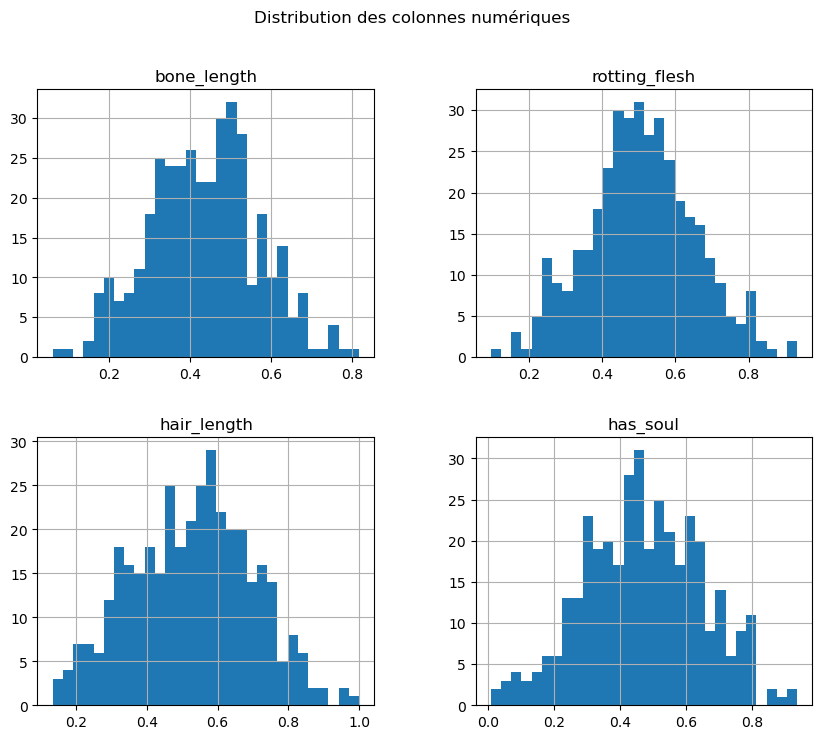

In [5]:
import matplotlib.pyplot as plt

num_cols_final.hist(bins=30, figsize=(10, 8))
plt.suptitle('Distribution des colonnes numériques')
plt.show()

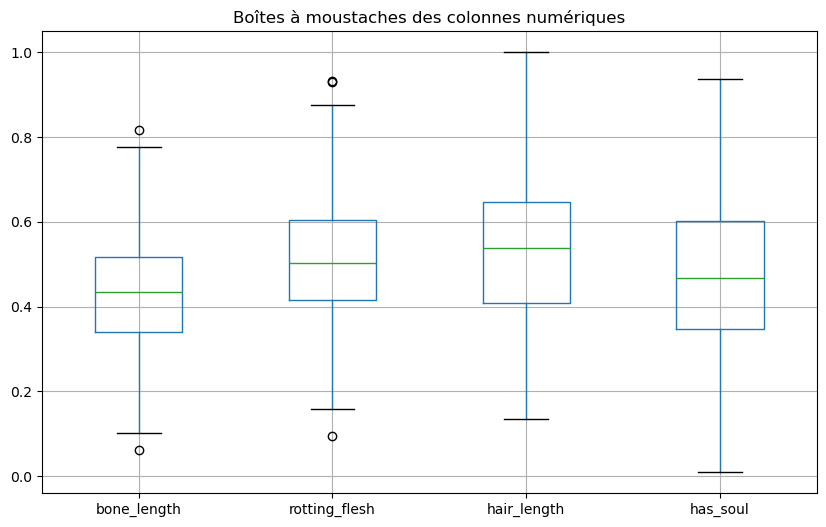

In [6]:
num_cols_final.boxplot(figsize=(10, 6))
plt.title('Boîtes à moustaches des colonnes numériques')
plt.show()

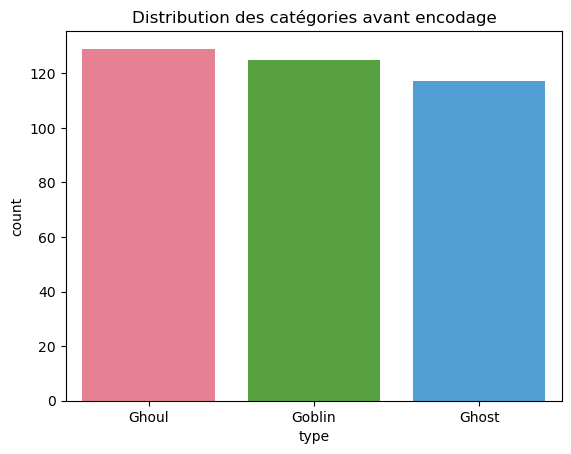

In [23]:
cat_cols=df.select_dtypes(include=['object']) #Séparation colonnes catégoriques

import seaborn as sns

palette = sns.color_palette("husl", n_colors=3)
sns.countplot(x='type', data=cat_cols, hue='type', palette=palette, legend=False)
plt.title('Distribution des catégories avant encodage')
plt.show()

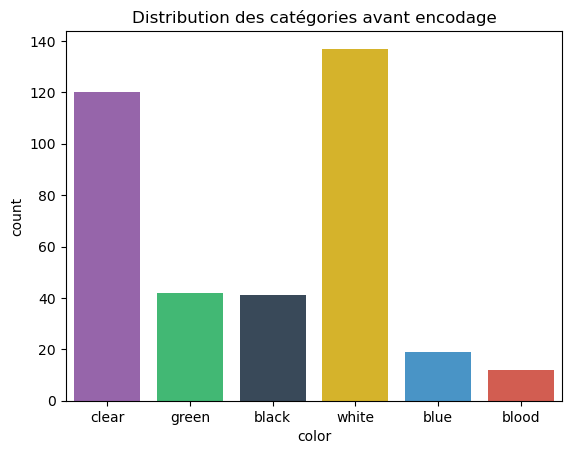

In [40]:
colors = ['#9b59b6','#2ecc71','#34495e' ,  '#f1c40f','#3498db' , '#e74c3c']
sns.countplot(x='color', data=cat_cols,hue='color', palette=colors, legend=False)
plt.title('Distribution des catégories avant encodage')
plt.show()

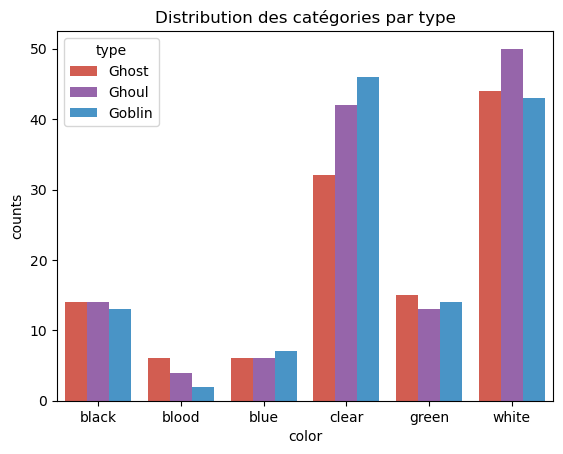

In [47]:
palette = {
    'Ghoul': '#9b59b6',
    'Goblin': '#3498db',
    'Ghost': '#e74c3c'
}


count_data = cat_cols.groupby(['color', 'type']).size().reset_index(name='counts')

sns.barplot(data=count_data, x='color', y='counts', hue='type', palette=palette)
plt.title("Distribution des catégories par type")
plt.show()

In [10]:
cat_cols_final=cat_cols.drop(["type"],axis=1) # On enlève la catégorie à prédire

In [11]:
#OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ohe_result = ohe.fit_transform(cat_cols_final).toarray()

print(ohe_result)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [12]:
df_ohe=pd.DataFrame(ohe_result,columns=ohe.get_feature_names_out(['color']))

print("df catégorie encodée", df_ohe.head())

df catégorie encodée    color_black  color_blood  color_blue  color_clear  color_green  color_white
0          0.0          0.0         0.0          1.0          0.0          0.0
1          0.0          0.0         0.0          0.0          1.0          0.0
2          1.0          0.0         0.0          0.0          0.0          0.0
3          1.0          0.0         0.0          0.0          0.0          0.0
4          0.0          0.0         0.0          0.0          1.0          0.0


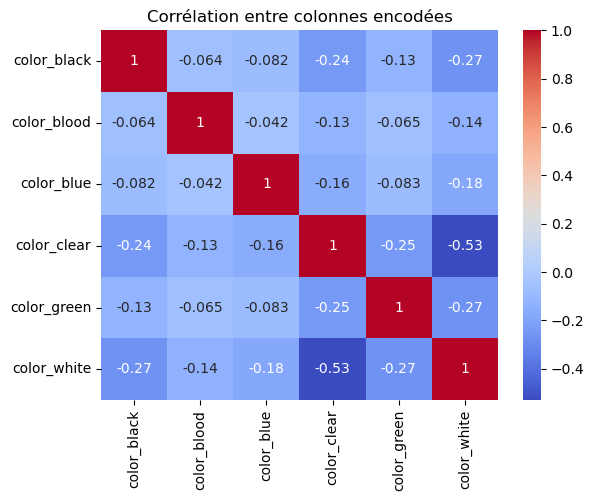

In [13]:
sns.heatmap(df_ohe.corr(), annot=True, cmap='coolwarm')

plt.title('Corrélation entre colonnes encodées')

plt.show()

In [14]:
df_final = pd.concat([num_cols_final.reset_index(drop=True), df_ohe], axis=1) #Concaténation pour avoir le df numérique final

print("df final \n", df_final.head())

df final 
    bone_length  rotting_flesh  hair_length  has_soul  color_black  \
0     0.354512       0.350839     0.465761  0.781142          0.0   
1     0.575560       0.425868     0.531401  0.439899          0.0   
2     0.467875       0.354330     0.811616  0.791225          1.0   
3     0.776652       0.508723     0.636766  0.884464          1.0   
4     0.566117       0.875862     0.418594  0.636438          0.0   

   color_blood  color_blue  color_clear  color_green  color_white  
0          0.0         0.0          1.0          0.0          0.0  
1          0.0         0.0          0.0          1.0          0.0  
2          0.0         0.0          0.0          0.0          0.0  
3          0.0         0.0          0.0          0.0          0.0  
4          0.0         0.0          0.0          1.0          0.0  


In [15]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(df_final,df['type'],test_size=0.2)

In [16]:
#model linearSVC

from sklearn import svm

clf=svm.LinearSVC(dual="auto")

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(y_pred)

['Ghost' 'Ghoul' 'Ghost' 'Ghoul' 'Ghoul' 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul'
 'Ghoul' 'Ghost' 'Ghost' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghost' 'Ghoul'
 'Ghost' 'Ghoul' 'Ghost' 'Ghoul' 'Ghoul' 'Ghost' 'Goblin' 'Ghoul' 'Goblin'
 'Goblin' 'Ghoul' 'Goblin' 'Ghost' 'Ghost' 'Ghoul' 'Goblin' 'Ghoul'
 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghost' 'Ghoul' 'Ghost' 'Ghost'
 'Goblin' 'Ghoul' 'Ghost' 'Ghoul' 'Ghost' 'Goblin' 'Ghoul' 'Goblin'
 'Ghost' 'Ghost' 'Ghoul' 'Goblin' 'Ghost' 'Goblin' 'Goblin' 'Ghoul'
 'Ghoul' 'Ghost' 'Ghost' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghost' 'Ghoul'
 'Goblin' 'Ghoul' 'Ghoul' 'Ghost' 'Ghoul' 'Ghoul']


In [17]:
from sklearn.metrics import accuracy_score 

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7066666666666667


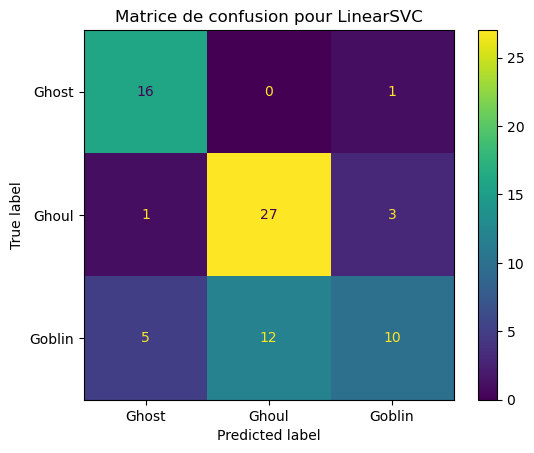

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)
plt.title('Matrice de confusion pour LinearSVC')
plt.show()